# **Drug Discovery [Part 6] using KNN**

In **Part 6**, we will be building a regression model of acetylcholinesterase inhibitors using the KNN algorithm with grid search CV to find the best model.


---

## **1. Import libraries**

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor



## **2. Load the data set**

In [3]:
df = pd.read_csv('/content/A10.coronavirus_Descriptor_IWSSR_Scaled.csv')
X1 = df.drop('Unnamed: 0', axis=1)
X1

,MW,NumHAcceptors,NumHDonors,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP12,PubchemFP14,PubchemFP15,PubchemFP16,...,PubchemFP824,PubchemFP826,PubchemFP827,PubchemFP828,PubchemFP830,PubchemFP831,PubchemFP833,PubchemFP834,PubchemFP835,pIC50
0,-1.046883,-0.111915,-0.983696,0.29767,-0.694808,-0.190117,-1.267304,0.362738,0.713283,-0.658281,...,-0.154303,-0.108465,-0.108465,-0.108465,-0.154303,-0.108465,-0.108465,-0.108465,-0.108465,0.304375
1,0.440308,-1.555624,-0.983696,0.29767,-0.694808,-0.190117,-1.267304,0.362738,-1.401969,-0.658281,...,-0.154303,-0.108465,-0.108465,-0.108465,-0.154303,-0.108465,-0.108465,-0.108465,-0.108465,0.184652
2,0.502323,-0.593151,-0.983696,0.29767,-0.694808,-0.190117,0.789076,0.362738,-1.401969,-0.658281,...,6.480741,-0.108465,-0.108465,-0.108465,-0.154303,-0.108465,-0.108465,-0.108465,-0.108465,0.022115
3,-0.913175,-1.074388,-0.983696,0.29767,-0.694808,-0.190117,0.789076,0.362738,-1.401969,-0.658281,...,-0.154303,-0.108465,-0.108465,-0.108465,-0.154303,-0.108465,-0.108465,-0.108465,-0.108465,0.035278
4,-0.414961,-0.111915,-0.983696,0.29767,-0.694808,-0.190117,0.789076,0.362738,0.713283,-0.658281,...,-0.154303,-0.108465,-0.108465,-0.108465,-0.154303,-0.108465,9.219544,-0.108465,-0.108465,0.879543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,-0.414795,-0.111915,-0.983696,0.29767,1.439246,-0.190117,0.789076,-2.756810,-1.401969,-0.658281,...,-0.154303,-0.108465,-0.108465,-0.108465,-0.154303,-0.108465,-0.108465,-0.108465,-0.108465,-0.178411
82,-0.879749,-1.074388,-0.983696,0.29767,1.439246,-0.190117,0.789076,-2.756810,-1.401969,-0.658281,...,-0.154303,-0.108465,-0.108465,-0.108465,-0.154303,-0.108465,-0.108465,-0.108465,-0.108465,-1.244550
83,-1.102022,-1.074388,-0.983696,0.29767,-0.694808,-0.190117,0.789076,-2.756810,-1.401969,-0.658281,...,-0.154303,-0.108465,-0.108465,-0.108465,-0.154303,-0.108465,-0.108465,-0.108465,-0.108465,-0.450773
84,-1.079701,-1.074388,-0.983696,0.29767,-0.694808,-0.190117,0.789076,-2.756810,-1.401969,-0.658281,...,-0.154303,-0.108465,-0.108465,-0.108465,-0.154303,-0.108465,-0.108465,-0.108465,-0.108465,-0.006864


## **3. Input features**
The final ***Coronavirus*** data set contains 471 input features and 1 output variable (pIC50 values).

### **3.1. Input features**

In [4]:
X = X1.drop('pIC50', axis=1)
X

,MW,NumHAcceptors,NumHDonors,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP12,PubchemFP14,PubchemFP15,PubchemFP16,...,PubchemFP822,PubchemFP824,PubchemFP826,PubchemFP827,PubchemFP828,PubchemFP830,PubchemFP831,PubchemFP833,PubchemFP834,PubchemFP835
0,-1.046883,-0.111915,-0.983696,0.29767,-0.694808,-0.190117,-1.267304,0.362738,0.713283,-0.658281,...,-0.248452,-0.154303,-0.108465,-0.108465,-0.108465,-0.154303,-0.108465,-0.108465,-0.108465,-0.108465
1,0.440308,-1.555624,-0.983696,0.29767,-0.694808,-0.190117,-1.267304,0.362738,-1.401969,-0.658281,...,4.024922,-0.154303,-0.108465,-0.108465,-0.108465,-0.154303,-0.108465,-0.108465,-0.108465,-0.108465
2,0.502323,-0.593151,-0.983696,0.29767,-0.694808,-0.190117,0.789076,0.362738,-1.401969,-0.658281,...,-0.248452,6.480741,-0.108465,-0.108465,-0.108465,-0.154303,-0.108465,-0.108465,-0.108465,-0.108465
3,-0.913175,-1.074388,-0.983696,0.29767,-0.694808,-0.190117,0.789076,0.362738,-1.401969,-0.658281,...,-0.248452,-0.154303,-0.108465,-0.108465,-0.108465,-0.154303,-0.108465,-0.108465,-0.108465,-0.108465
4,-0.414961,-0.111915,-0.983696,0.29767,-0.694808,-0.190117,0.789076,0.362738,0.713283,-0.658281,...,-0.248452,-0.154303,-0.108465,-0.108465,-0.108465,-0.154303,-0.108465,9.219544,-0.108465,-0.108465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,-0.414795,-0.111915,-0.983696,0.29767,1.439246,-0.190117,0.789076,-2.756810,-1.401969,-0.658281,...,-0.248452,-0.154303,-0.108465,-0.108465,-0.108465,-0.154303,-0.108465,-0.108465,-0.108465,-0.108465
82,-0.879749,-1.074388,-0.983696,0.29767,1.439246,-0.190117,0.789076,-2.756810,-1.401969,-0.658281,...,-0.248452,-0.154303,-0.108465,-0.108465,-0.108465,-0.154303,-0.108465,-0.108465,-0.108465,-0.108465
83,-1.102022,-1.074388,-0.983696,0.29767,-0.694808,-0.190117,0.789076,-2.756810,-1.401969,-0.658281,...,-0.248452,-0.154303,-0.108465,-0.108465,-0.108465,-0.154303,-0.108465,-0.108465,-0.108465,-0.108465
84,-1.079701,-1.074388,-0.983696,0.29767,-0.694808,-0.190117,0.789076,-2.756810,-1.401969,-0.658281,...,-0.248452,-0.154303,-0.108465,-0.108465,-0.108465,-0.154303,-0.108465,-0.108465,-0.108465,-0.108465


### **3.2. Output features**

In [5]:
Y = df.pIC50
Y

0     0.304375
1     0.184652
2     0.022115
3     0.035278
4     0.879543
        ...   
81   -0.178411
82   -1.244550
83   -0.450773
84   -0.006864
85   -0.178411
Name: pIC50, Length: 86, dtype: float64

### **3.3. Let's examine the data dimension**

In [6]:
X.shape

(86, 471)

In [7]:
Y.shape

(86,)

### **3.4. Remove low variance features**

In [ ]:
#from sklearn.feature_selection import VarianceThreshold
#selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
#X = selection.fit_transform(X)

In [ ]:
#X.shape

(86, 306)

## **4. Data split (80/20 ratio)**

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [9]:
X_train.shape, Y_train.shape

((68, 471), (68,))

In [10]:
X_test.shape, Y_test.shape

((18, 471), (18,))

In [12]:
np.arange(20)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

## **5. Building a Regression Model using Random Forest**

Preforming Grid Search CV to find the best parameters for KNN:

In [13]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_neighbors': np.arange(20),
    'weights': ['uniform', 'distance'],
    'p': [1, 2],
    'metric': ['minkowski', 'euclidean', 'manhattan', 'chebyshev'],
}

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

knn = KNeighborsRegressor()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, Y_train)
print(f'Best parameters: {grid_search.best_params_}')
print(f'Best R² score: {grid_search.best_score_:.2f}')



Best parameters: {'metric': 'minkowski', 'n_neighbors': 4, 'p': 1, 'weights': 'uniform'}
Best R² score: 0.52


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
80 fits failed out of a total of 1600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_regression.py", line 215, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklear

Fitting the best model according to Grid Search:

In [15]:
knn = KNeighborsRegressor(metric='minkowski',n_neighbors=4,p= 1,weights='uniform')
knn.fit(X_train, Y_train)
Y_pred=knn.predict(X_test)
mse= mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print("MSE Score:",mse, "\nR2 Score:",r2)


MSE Score: 0.3242619043503669 
R2 Score: 0.6961960172099991


## **6. Scatter Plot of Experimental vs Predicted pIC50 Values**

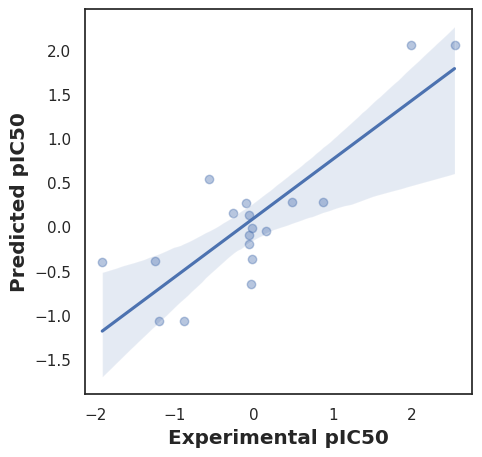

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.figure.set_size_inches(5, 5)
plt.show()